In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/gdrive/MyDrive/gender classification/archive (1).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_ds="/content/Training"
test_ds="/content/Validation"


In [ ]:
os.listdir('/content/Training')

['male', 'female']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 


test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
img= train_generator[0]
print(img)

(array([[[[  2.8922877,   3.1077123,   3.       ],
         [  3.       ,   3.       ,   3.       ],
         [  3.0788615,   3.0788615,   3.2365844],
         ...,
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ]],

        [[  2.891073 ,   3.108927 ,   3.7101877],
         [  3.       ,   3.       ,   3.7970028],
         [  3.0467043,   3.0467043,   3.9371161],
         ...,
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ]],

        [[  2.8898582,   3.1101418,   4.7797165],
         [  3.       ,   3.       ,   5.       ],
         [  3.       ,   3.       ,   5.       ],
         ...,
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ],
         [ 27.       ,  26.       ,  24.       ]],

        ...,

        [[207.29436  , 207.29436  , 2

In [ ]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [ ]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [ ]:
print(len(train_generator))
print(len(test_ds))


1470
19


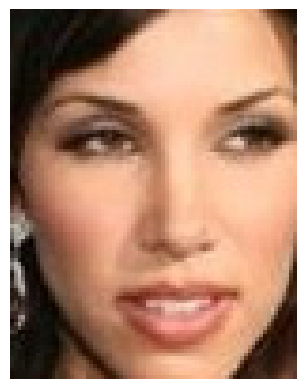

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/Training/female/131435.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from google.colab.patches import cv2_imshow

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(20, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 20

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [ ]:
odel.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history =model.fit(train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
1470/1470 [==============================] - 809s 549ms/step - loss: 0.4645 - accuracy: 0.7674 - val_loss: 0.1648 - val_accuracy: 0.9393
Epoch 2/5
1470/1470 [==============================] - 772s 525ms/step - loss: 0.1548 - accuracy: 0.9442 - val_loss: 0.1135 - val_accuracy: 0.9579
Epoch 3/5
1470/1470 [==============================] - 813s 553ms/step - loss: 0.1314 - accuracy: 0.9528 - val_loss: 0.0978 - val_accuracy: 0.9639
Epoch 4/5
1470/1470 [==============================] - 771s 524ms/step - loss: 0.1210 - accuracy: 0.9572 - val_loss: 0.0920 - val_accuracy: 0.9670
Epoch 5/5
1470/1470 [==============================] - 815s 554ms/step - loss: 0.1120 - accuracy: 0.9613 - val_loss: 0.0838 - val_accuracy: 0.9716


In [ ]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.464496,0.767406,0.164849,0.939308
1,0.154750,0.944202,0.113469,0.957850
2,0.131437,0.952839,0.097791,0.963945
3,0.121026,0.957178,0.092010,0.967036
4,0.112032,0.961284,0.083801,0.971586


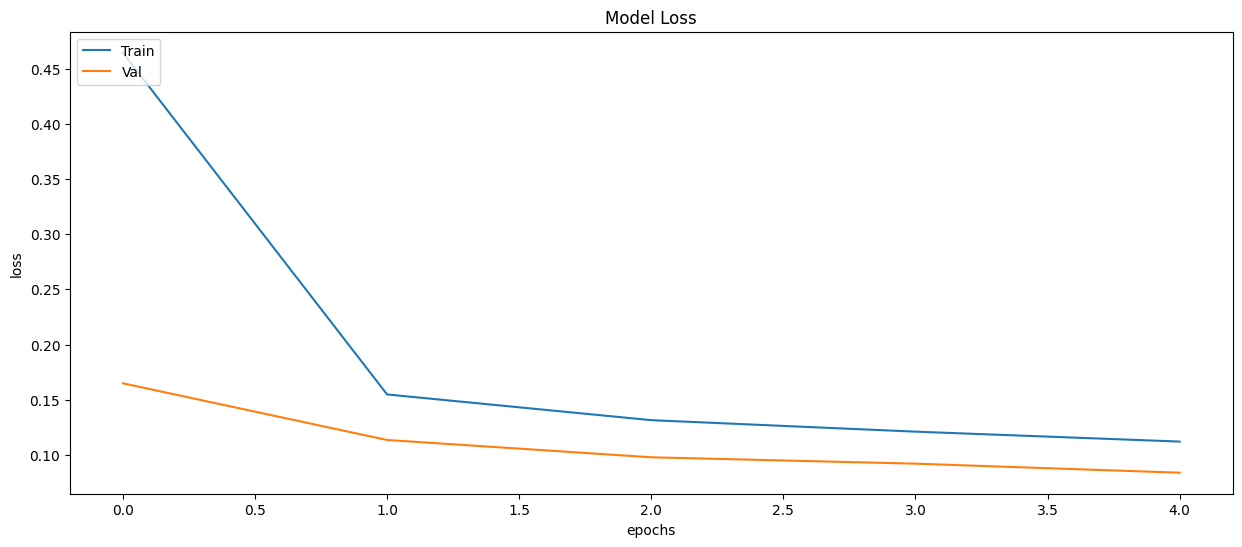

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

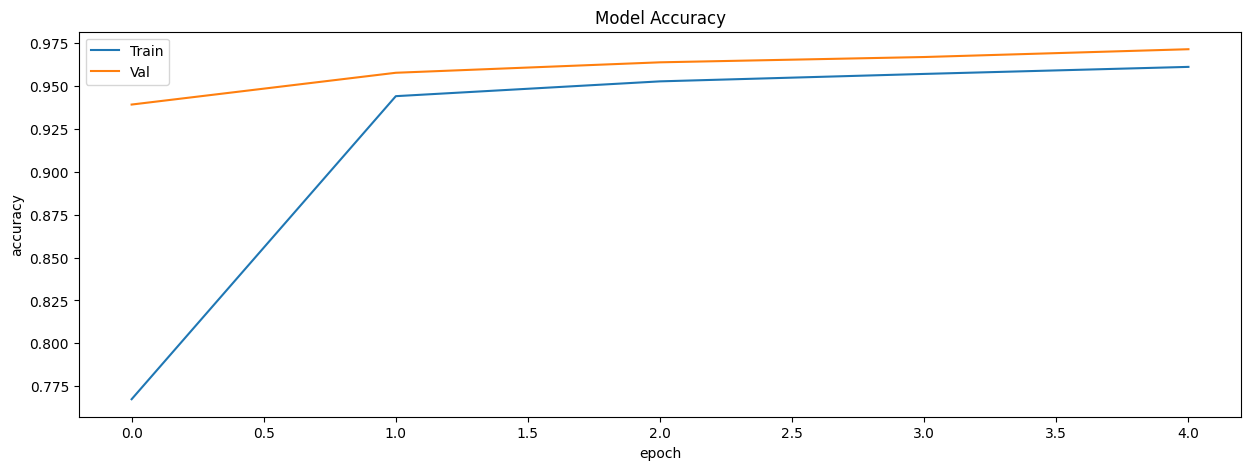

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 45s 122ms/step


In [ ]:
results =model.evaluate(test_generator)

 65/365 [====>.........................] - ETA: 37s - loss: 0.0621 - accuracy: 0.9803